Import Library

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Membaca Data

In [208]:
df = pd.read_csv("toyota.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


Mengecek tipe data pada semua Kolom

In [209]:
print(df.dtypes)

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object


In [210]:
df.shape

(6738, 9)

Mengecek data yang kosong

In [211]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Melihat isi data masing-masing Kolom

In [212]:
for kolom in df.columns:
  print('Kolom', kolom, df[kolom].unique())
  print('------------------------------------------------------------')

Kolom model [' GT86' ' Corolla' ' RAV4' ' Yaris' ' Auris' ' Aygo' ' C-HR' ' Prius'
 ' Avensis' ' Verso' ' Hilux' ' PROACE VERSO' ' Land Cruiser' ' Supra'
 ' Camry' ' Verso-S' ' IQ' ' Urban Cruiser']
------------------------------------------------------------
Kolom year [2016 2017 2015 2020 2013 2019 2018 2014 2012 2005 2003 2004 2001 2008
 2007 2010 2011 2006 2009 2002 1999 2000 1998]
------------------------------------------------------------
Kolom price [16000 15995 13998 ...  4950  4849  4985]
------------------------------------------------------------
Kolom transmission ['Manual' 'Automatic' 'Semi-Auto' 'Other']
------------------------------------------------------------
Kolom mileage [24089 18615 27469 ... 36154 60700 45128]
------------------------------------------------------------
Kolom fuelType ['Petrol' 'Other' 'Hybrid' 'Diesel']
------------------------------------------------------------
Kolom tax [265 145 150 260 200 250 140 135 235 300 125  20 160 165 205 240 330 325

Melihat Informasi Data

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


Analisis Deskriptif

In [214]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In [215]:
data = df.copy()

In [216]:
#memfilter baris-baris dalam DataFrame data yang memiliki nilai kolom 'engineSize' yang bukan nol
data = data[data['engineSize'] != 0]

In [217]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,6732.000000,6732.000000,6732.000000,6732.000000,6732.000000,6732.000000
mean,2016.747326,12524.134135,22861.424094,94.694742,63.040686,1.472608
std,2.204492,6347.214584,19126.167835,73.884964,15.837030,0.434134
min,1998.000000,850.000000,2.000000,0.000000,2.800000,1.000000
25%,2016.000000,8290.000000,9448.500000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18516.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31061.250000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


Visualisasi Distribusi Statistik Data

c:\Users\Widnyana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

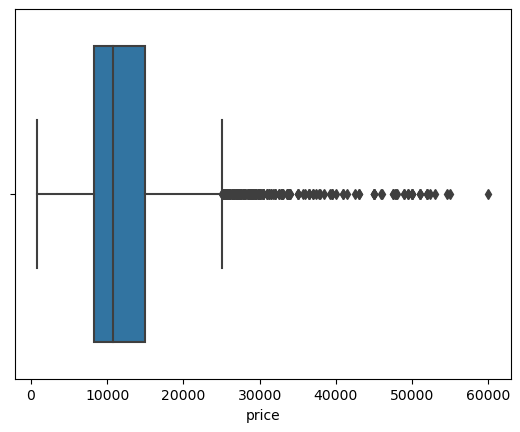

In [218]:
import seaborn as sns
sns.boxplot(data['price'])

Filtrasi DataFrame & pemilihan baris-baris dalam rentang tertentu

In [219]:
#sorted(data['price'], reverse=True)
data = data[~(data['price']>=55000) & (data['price']<=60000)]


In [220]:
#sorted(data['tax'], reverse=True)
data = data[~(data['tax']>330) & (data['tax']<=565)]

In [221]:
data = data[~(data['mpg']>200) & (data['mpg']<240)]

In [222]:
#sorted(data['engineSize'], reverse=True)
data = data[~(data['engineSize']>3.0) & (data['engineSize']<5.0)]

Visualisasi Distribusi Data Engine Size

c:\Users\Widnyana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engineSize'>

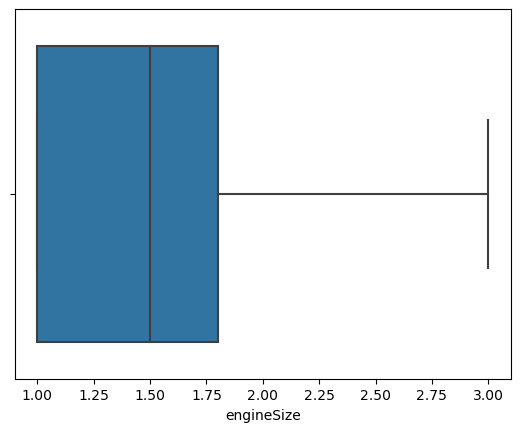

In [223]:
sns.boxplot(data['engineSize'])

In [224]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000
mean,2016.747540,12476.629138,22831.389651,94.325977,62.547808,1.470042
std,2.187129,6281.829868,18987.127051,73.318947,12.845350,0.430512
min,1999.000000,850.000000,2.000000,0.000000,2.800000,1.000000
25%,2016.000000,8275.000000,9461.500000,0.000000,55.400000,1.000000
50%,2017.000000,10790.000000,18570.000000,135.000000,62.100000,1.500000
75%,2018.000000,14995.000000,31057.000000,145.000000,69.000000,1.800000
max,2020.000000,54991.000000,167054.000000,330.000000,134.500000,3.000000


In [225]:
data2 = data.copy()

DataFrame yang sudah dilabeli (Encoder)

In [226]:
print(data2)

               model  year  price transmission  mileage fuelType  tax   mpg  \
0               GT86  2016  16000       Manual    24089   Petrol  265  36.2   
1               GT86  2017  15995       Manual    18615   Petrol  145  36.2   
2               GT86  2015  13998       Manual    27469   Petrol  265  36.2   
3               GT86  2017  18998       Manual    14736   Petrol  150  36.2   
4               GT86  2017  17498       Manual    36284   Petrol  145  36.2   
...              ...   ...    ...          ...      ...      ...  ...   ...   
6733              IQ  2011   5500    Automatic    30000   Petrol   20  58.9   
6734   Urban Cruiser  2011   4985       Manual    36154   Petrol  125  50.4   
6735   Urban Cruiser  2012   4995       Manual    46000   Diesel  125  57.6   
6736   Urban Cruiser  2011   3995       Manual    60700   Petrol  125  50.4   
6737   Urban Cruiser  2011   4495       Manual    45128   Petrol  125  50.4   

      engineSize  
0            2.0  
1            

Melihat isi data yang bertipe string

In [227]:
unique_models = data2['model'].unique()
print(unique_models)


[' GT86' ' Corolla' ' RAV4' ' Yaris' ' Auris' ' Aygo' ' C-HR' ' Prius'
 ' Avensis' ' Verso' ' Hilux' ' PROACE VERSO' ' Land Cruiser' ' Supra'
 ' Camry' ' Verso-S' ' IQ' ' Urban Cruiser']


In [228]:
unique_models = data2['fuelType'].unique()
print(unique_models)


['Petrol' 'Other' 'Hybrid' 'Diesel']


In [229]:
unique_models = data2['transmission'].unique()
print(unique_models)


['Manual' 'Automatic' 'Semi-Auto' 'Other']


In [230]:
print(data2['model'])


0                 GT86
1                 GT86
2                 GT86
3                 GT86
4                 GT86
             ...      
6733                IQ
6734     Urban Cruiser
6735     Urban Cruiser
6736     Urban Cruiser
6737     Urban Cruiser
Name: model, Length: 6706, dtype: object


Encoding kolom yang bertipe object menjadi numerik

In [231]:
l = LabelEncoder()

for i in data2.columns:
  if data2[i].dtype == 'object':
    data2[i] = l.fit_transform(data2[i])

In [232]:
print(data2)

      model  year  price  transmission  mileage  fuelType  tax   mpg  \
0         6  2016  16000             1    24089         3  265  36.2   
1         6  2017  15995             1    18615         3  145  36.2   
2         6  2015  13998             1    27469         3  265  36.2   
3         6  2017  18998             1    14736         3  150  36.2   
4         6  2017  17498             1    36284         3  145  36.2   
...     ...   ...    ...           ...      ...       ...  ...   ...   
6733      8  2011   5500             0    30000         3   20  58.9   
6734     14  2011   4985             1    36154         3  125  50.4   
6735     14  2012   4995             1    46000         0  125  57.6   
6736     14  2011   3995             1    60700         3  125  50.4   
6737     14  2011   4495             1    45128         3  125  50.4   

      engineSize  
0            2.0  
1            2.0  
2            2.0  
3            2.0  
4            2.0  
...          ...  
67

In [233]:
data2.describe ()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
count,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000
mean,8.129287,2016.747540,12476.629138,0.683567,22831.389651,2.158217,94.325977,62.547808,1.470042
std,6.951166,2.187129,6281.829868,0.666278,18987.127051,1.087872,73.318947,12.845350,0.430512
min,0.000000,1999.000000,850.000000,0.000000,2.000000,0.000000,0.000000,2.800000,1.000000
25%,2.000000,2016.000000,8275.000000,0.000000,9461.500000,1.000000,0.000000,55.400000,1.000000
50%,5.000000,2017.000000,10790.000000,1.000000,18570.000000,3.000000,135.000000,62.100000,1.500000
75%,17.000000,2018.000000,14995.000000,1.000000,31057.000000,3.000000,145.000000,69.000000,1.800000
max,17.000000,2020.000000,54991.000000,3.000000,167054.000000,3.000000,330.000000,134.500000,3.000000


Mengecek hasil encoding dan Pencocokan dengan Data Sebelum Encoding

In [234]:
unique_models = data2['model'].unique()
print(unique_models)


[ 6  5 12 17  0  2  3 11  1 15  7 10  9 13  4 16  8 14]


In [235]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi encoder
encoder = LabelEncoder()

# Daftar model yang ingin dilabeli
model_list = [' GT86', ' Corolla', ' RAV4', ' Yaris', ' Auris', ' Aygo', ' C-HR', ' Prius',
 ' Avensis', ' Verso', ' Hilux', ' PROACE VERSO', ' Land Cruiser', ' Supra',
 ' Camry', ' Verso-S', ' IQ', ' Urban Cruiser']

# Melakukan encoding pada kolom 'model' dalam DataFrame data2
data2['model_encoded'] = encoder.fit_transform(data2['model'])

# Membuat dictionary untuk memetakan hasil encoding ke nilai aktual
encoding_map = dict(zip(range(len(model_list)), model_list))

# Mencetak hasil encoding beserta nilai aktual
for encoded_value, actual_value in encoding_map.items():
    print(f"Encoded: {encoded_value}, Actual: {actual_value}")


Encoded: 0, Actual:  GT86
Encoded: 1, Actual:  Corolla
Encoded: 2, Actual:  RAV4
Encoded: 3, Actual:  Yaris
Encoded: 4, Actual:  Auris
Encoded: 5, Actual:  Aygo
Encoded: 6, Actual:  C-HR
Encoded: 7, Actual:  Prius
Encoded: 8, Actual:  Avensis
Encoded: 9, Actual:  Verso
Encoded: 10, Actual:  Hilux
Encoded: 11, Actual:  PROACE VERSO
Encoded: 12, Actual:  Land Cruiser
Encoded: 13, Actual:  Supra
Encoded: 14, Actual:  Camry
Encoded: 15, Actual:  Verso-S
Encoded: 16, Actual:  IQ
Encoded: 17, Actual:  Urban Cruiser


In [236]:
unique_models = data2['fuelType'].unique()
print(unique_models)


[3 2 1 0]


In [237]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi encoder
encoder = LabelEncoder()

# Daftar tipe bahan bakar yang ingin dilabeli
fuel_type_list = ['Petrol', 'Other', 'Hybrid', 'Diesel']

# Melakukan encoding pada kolom 'fuelType' dalam DataFrame data2
data2['fuelType_encoded'] = encoder.fit_transform(data2['fuelType'])

# Membuat dictionary untuk memetakan hasil encoding ke nilai aktual
fuel_type_encoding_map = dict(zip(range(len(fuel_type_list)), fuel_type_list))

# Mencetak hasil encoding beserta nilai aktual
for encoded_value, actual_value in fuel_type_encoding_map.items():
    print(f"Encoded: {encoded_value}, Actual: {actual_value}")


Encoded: 0, Actual: Petrol
Encoded: 1, Actual: Other
Encoded: 2, Actual: Hybrid
Encoded: 3, Actual: Diesel


In [238]:
unique_models = data2['transmission'].unique()
print(unique_models)


[1 0 3 2]


In [239]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi encoder
encoder = LabelEncoder()

# Daftar tipe transmisi yang ingin dilabeli
transmission_list = ['Manual', 'Automatic', 'Semi-Auto', 'Other']

# Melakukan encoding pada kolom 'transmission' dalam DataFrame data2
data2['transmission_encoded'] = encoder.fit_transform(data2['transmission'])

# Membuat dictionary untuk memetakan hasil encoding ke nilai aktual
transmission_encoding_map = dict(zip(range(len(transmission_list)), transmission_list))

# Mencetak hasil encoding beserta nilai aktual
for encoded_value, actual_value in transmission_encoding_map.items():
    print(f"Encoded: {encoded_value}, Actual: {actual_value}")


Encoded: 0, Actual: Manual
Encoded: 1, Actual: Automatic
Encoded: 2, Actual: Semi-Auto
Encoded: 3, Actual: Other


In [240]:
print(data2)

      model  year  price  transmission  mileage  fuelType  tax   mpg  \
0         6  2016  16000             1    24089         3  265  36.2   
1         6  2017  15995             1    18615         3  145  36.2   
2         6  2015  13998             1    27469         3  265  36.2   
3         6  2017  18998             1    14736         3  150  36.2   
4         6  2017  17498             1    36284         3  145  36.2   
...     ...   ...    ...           ...      ...       ...  ...   ...   
6733      8  2011   5500             0    30000         3   20  58.9   
6734     14  2011   4985             1    36154         3  125  50.4   
6735     14  2012   4995             1    46000         0  125  57.6   
6736     14  2011   3995             1    60700         3  125  50.4   
6737     14  2011   4495             1    45128         3  125  50.4   

      engineSize  model_encoded  fuelType_encoded  transmission_encoded  
0            2.0              6                 3            

 Menghitung matriks korelasi 

<AxesSubplot:>

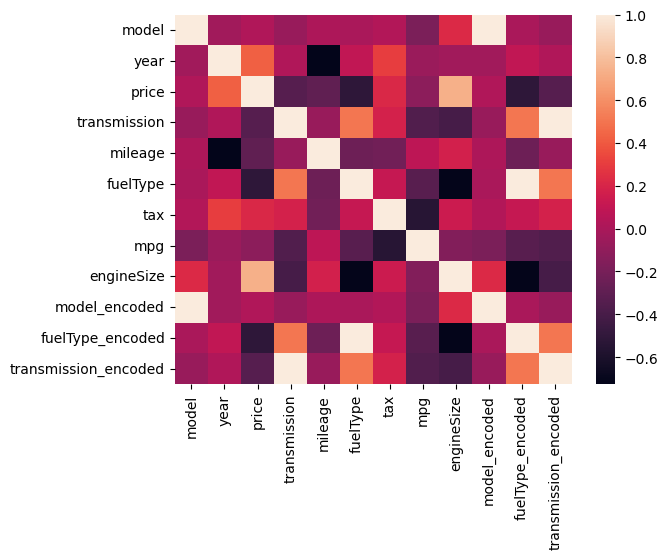

In [241]:
sns.heatmap(data2.corr())

In [242]:
data2.corr()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,model_encoded,fuelType_encoded,transmission_encoded
model,1.000000,-0.036632,0.026520,-0.067743,0.012121,-0.002449,0.030055,-0.181326,0.221338,1.000000,-0.002449,-0.067743
year,-0.036632,1.000000,0.425685,0.026639,-0.726561,0.095583,0.299729,-0.064866,-0.033805,-0.036632,0.095583,0.026639
price,0.026520,0.425685,1.000000,-0.335676,-0.301368,-0.517369,0.211883,-0.118598,0.733108,0.026520,-0.517369,-0.335676
transmission,-0.067743,0.026639,-0.335676,1.000000,-0.069405,0.506329,0.183180,-0.357030,-0.405284,-0.067743,0.506329,1.000000
mileage,0.012121,-0.726561,-0.301368,-0.069405,1.000000,-0.243876,-0.223759,0.076464,0.175093,0.012121,-0.243876,-0.069405
fuelType,-0.002449,0.095583,-0.517369,0.506329,-0.243876,1.000000,0.116371,-0.332310,-0.715206,-0.002449,1.000000,0.506329
tax,0.030055,0.299729,0.211883,0.183180,-0.223759,0.116371,1.000000,-0.550806,0.142796,0.030055,0.116371,0.183180
mpg,-0.181326,-0.064866,-0.118598,-0.357030,0.076464,-0.332310,-0.550806,1.000000,-0.155189,-0.181326,-0.332310,-0.357030
engineSize,0.221338,-0.033805,0.733108,-0.405284,0.175093,-0.715206,0.142796,-0.155189,1.000000,0.221338,-0.715206,-0.405284
model_encoded,1.000000,-0.036632,0.026520,-0.067743,0.012121,-0.002449,0.030055,-0.181326,0.221338,1.000000,-0.002449,-0.067743


pemisahan data menjadi fitur (features) dan target (label)

In [243]:
x = data2.drop('price', axis=1)
y = data2['price']

<AxesSubplot:xlabel='price', ylabel='Count'>

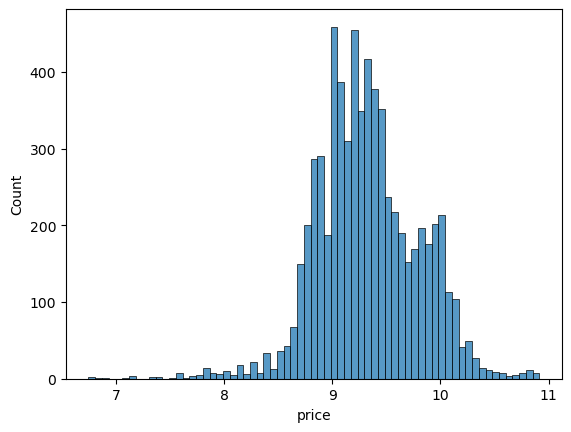

In [244]:
#Diagram Distribusi harga ke dalam skala logaritmik
sns.histplot(np.log(data2['price']))

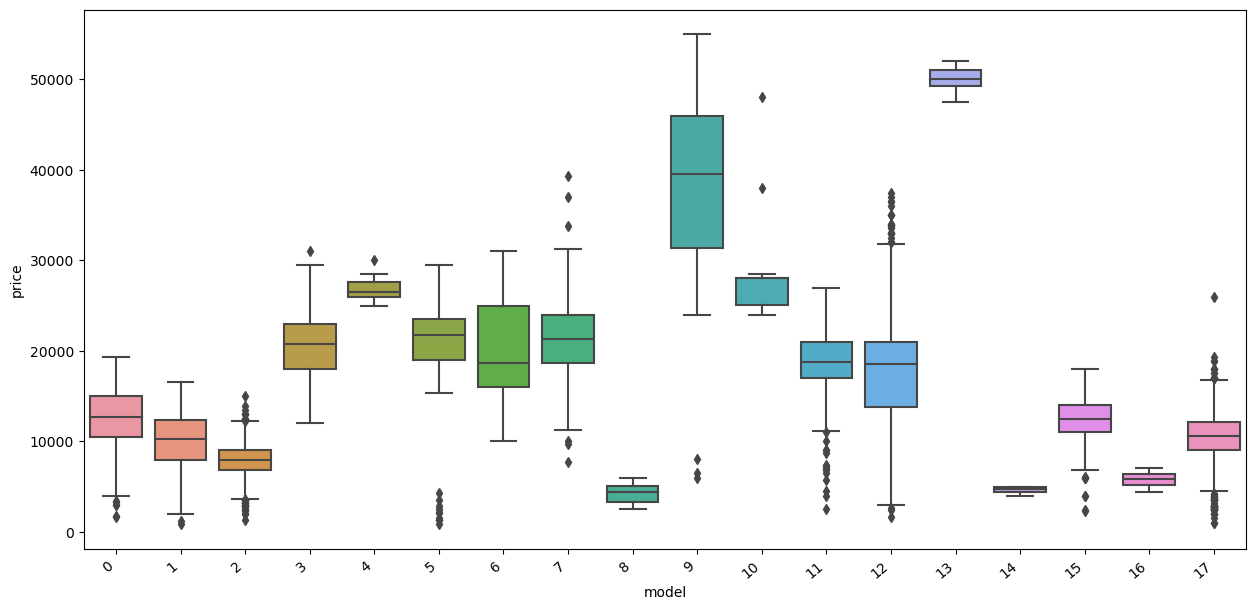

In [245]:
#Diagram distribusi harga untuk setiap model mobil
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='model',y='price',data=data2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

c:\Users\Widnyana\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Widnyana\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 57.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Widnyana\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Widnyana\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 74.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Widnyana\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.6

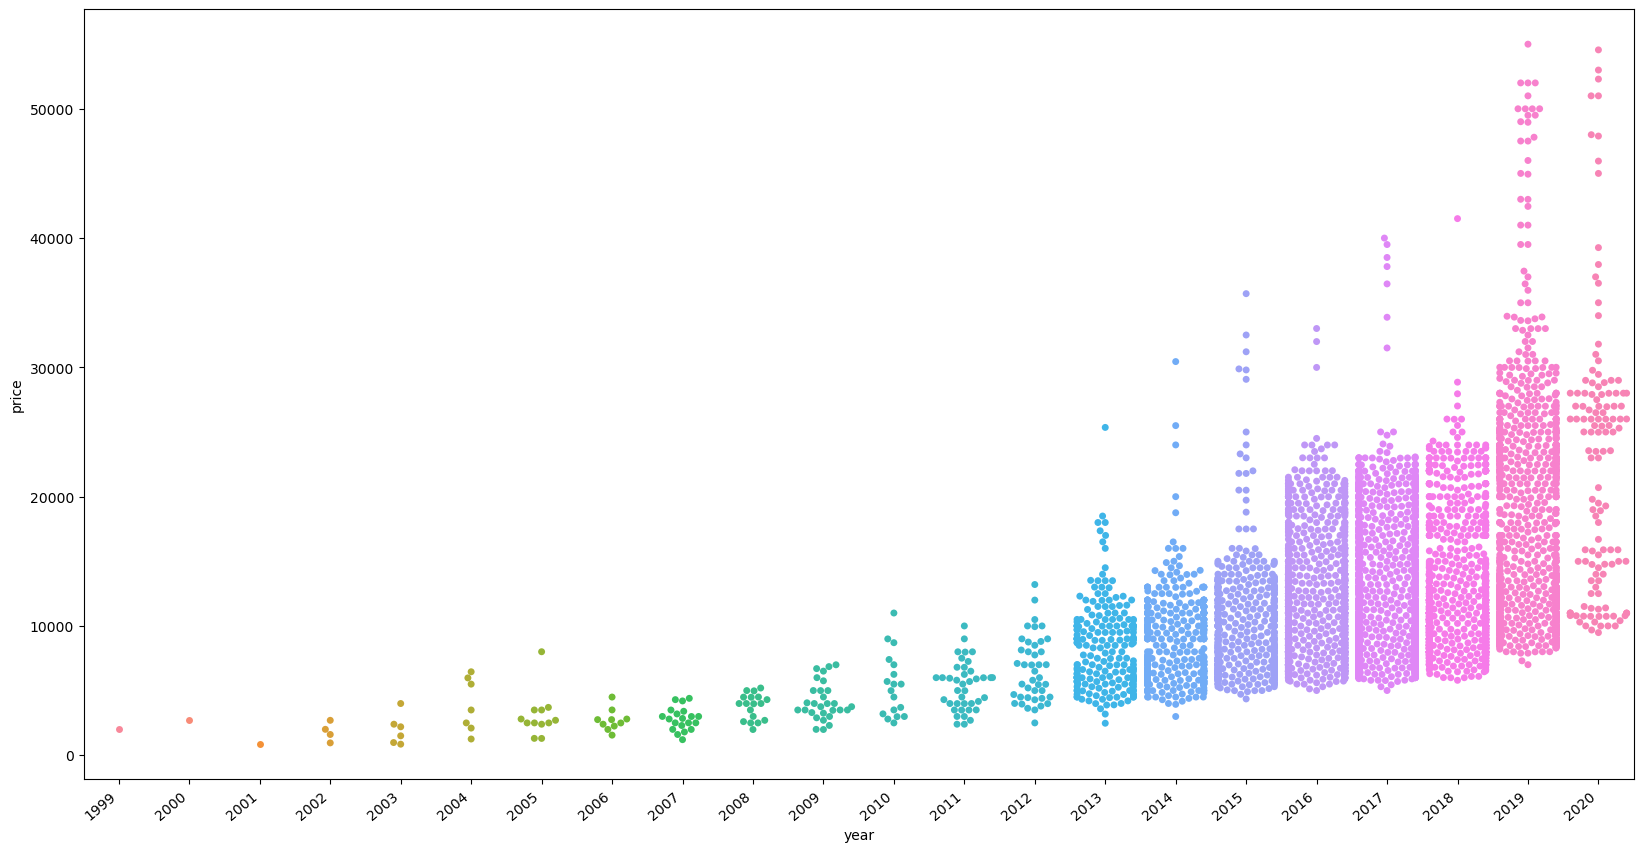

In [246]:
#Diagram visualisasi hubungan antara tahun pembuatan ('year') mobil dengan harga ('price') 
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='price',data=data2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

<AxesSubplot:xlabel='fuelType', ylabel='price'>

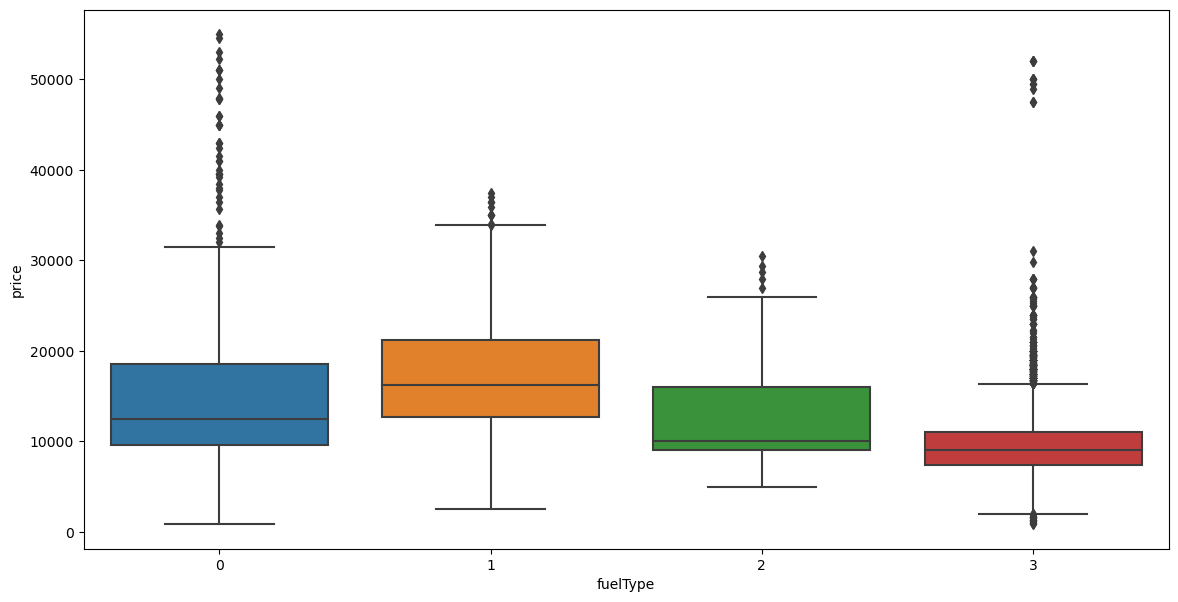

In [247]:
#Diagram distribusi harga ('price') untuk setiap tipe bahan bakar ('fuelType')
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuelType',y='price',data=data2)

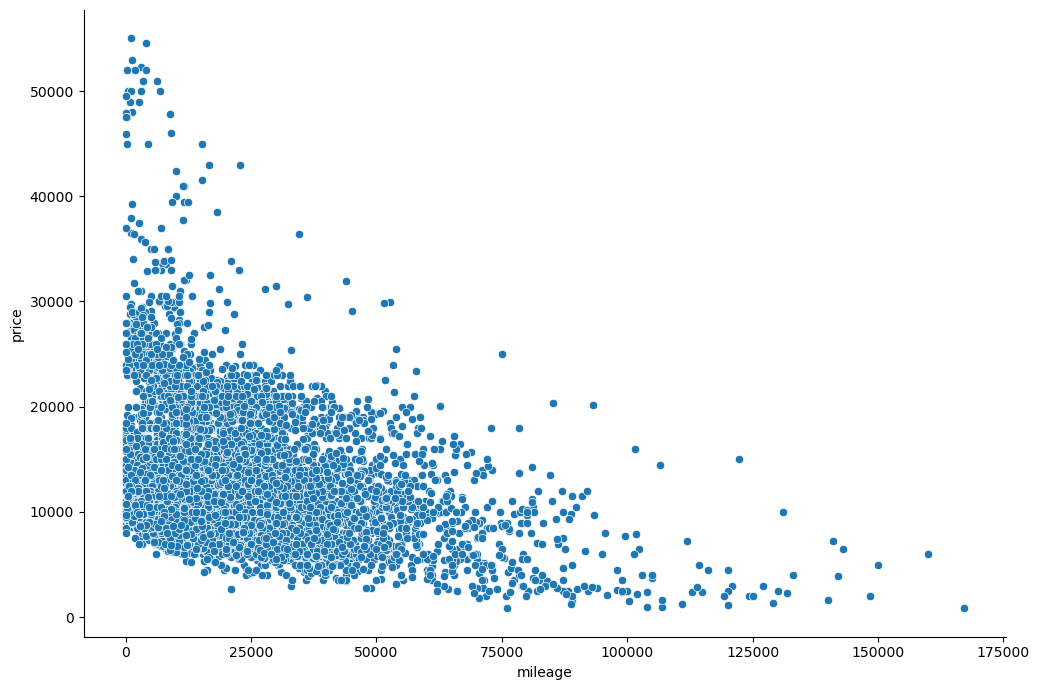

In [248]:
#Scatter Plot Hubungan antara jarak tempuh (mileage) dengan harga mobil
sns.relplot(x='mileage',y='price',data=data2,height=7,aspect=1.5)

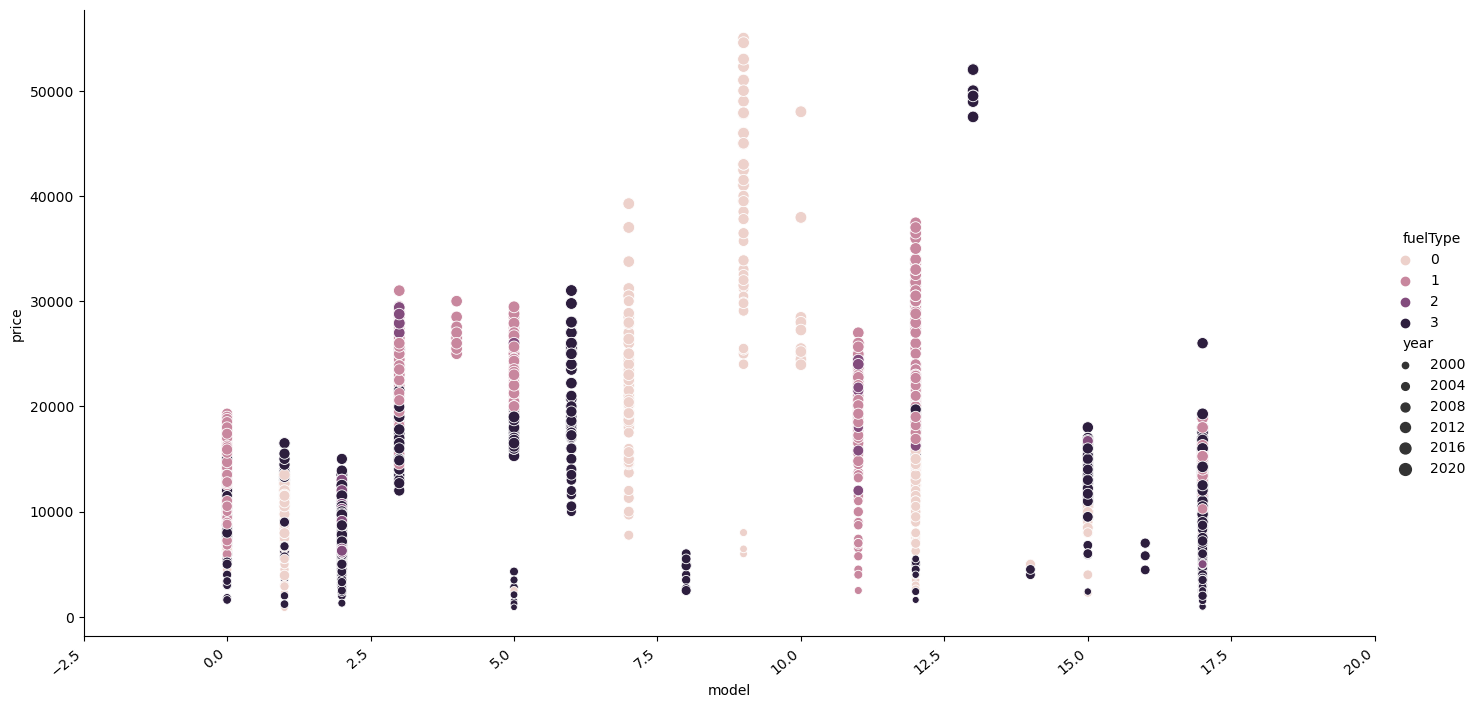

In [249]:
#scatter plot yang memvisualisasikan hubungan antara model mobil ('model'), harga ('price'), tipe bahan bakar ('fuelType'), dan tahun pembuatan ('year')
ax=sns.relplot(x='model',y='price',data=data2,hue='fuelType',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

In [250]:
#Pemilihan fitur untuk pemodelan
X=data2[['model', 'year', 'transmission','mileage', 'fuelType', 'tax','mpg', 'engineSize']]
y=data2['price']

In [251]:
X

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,6,2016,1,24089,3,265,36.2,2.0
1,6,2017,1,18615,3,145,36.2,2.0
2,6,2015,1,27469,3,265,36.2,2.0
3,6,2017,1,14736,3,150,36.2,2.0
4,6,2017,1,36284,3,145,36.2,2.0
...,...,...,...,...,...,...,...,...
6733,8,2011,0,30000,3,20,58.9,1.0
6734,14,2011,1,36154,3,125,50.4,1.3
6735,14,2012,1,46000,0,125,57.6,1.4
6736,14,2011,1,60700,3,125,50.4,1.3


In [252]:
y.shape

(6706,)

Tahap pemodelan dengan regresi linear

In [253]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import metrics

In [254]:
#Pembagian data latih dan data testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [255]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [256]:
# One-hot encoding digunakan untuk mengubah variabel kategorikal menjadi bentuk biner (0 dan 1)
ohe=OneHotEncoder()
ohe.fit(X[['model','transmission','fuelType']])

OneHotEncoder()

In [257]:
# membuat sebuah transformasi yang menggabungkan one-hot encoding dengan fitur-fitur lain dalam DataFrame `X`
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['model','transmission','fuelType']),
                                    remainder='passthrough')

In [258]:
#Inisiasi regresi linear
lr=LinearRegression()

In [259]:
#Membuat pipa (pipeline) yang menggabungkan transformasi kolom dan model regresi linear menggunakan `make_pipeline`
pipe=make_pipeline(column_trans,lr)

In [260]:
# Melatih model regresi linear yang telah dimasukkan ke dalam pipa (pipeline) menggunakan data pelatihan
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17]),
                                                                            array([0, 1, 2, 3]),
                                                                            array([0, 1, 2, 3])]),
                                                  ['model', 'transmission',
                                                   'fuelType'])])),
                ('linearregression', LinearRegression())])

In [261]:
# melakukan prediksi nilai target (`y`) pada data fitur pengujian (`X_test`) menggunakan pipa (pipeline)
y_pred=pipe.predict(X_test)

In [262]:
# menghitung skor koefisien determinasi (R-squared)
r2_score(y_test,y_pred)

0.917746290615727

In [263]:
# melatih dan menguji model regresi linear 
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [264]:
np.argmax(scores)

454

In [265]:
# nilai skor R-squared tertinggi dalam daftar `scores`
scores[np.argmax(scores)]

0.9258098901846896

In [266]:
# Mengukur kinerja model 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.9258098901846896

Menyimpan model regresi linear

In [267]:
import pickle
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))


In [268]:
#Pengujian model dengan inputan data oleh user
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array([1,	2017,	1,	14736,	3,	150,	36.2,	2.0]).reshape(1,8)))

array([15586.31685605])

Memastikan ulang

In [269]:
#Menampilkan tipe data dari masing-masing kolom pada 'data2'
for column in data2.columns:
    data_type = data2[column].dtype
    print(f"Column '{column}' has data type: {data_type}")


Column 'model' has data type: int32
Column 'year' has data type: int64
Column 'price' has data type: int64
Column 'transmission' has data type: int32
Column 'mileage' has data type: int64
Column 'fuelType' has data type: int32
Column 'tax' has data type: int64
Column 'mpg' has data type: float64
Column 'engineSize' has data type: float64
Column 'model_encoded' has data type: int64
Column 'fuelType_encoded' has data type: int64
Column 'transmission_encoded' has data type: int64


In [270]:
# Daftar nilai sebelum encoding pada kolom 'model'
original_models = ['GT86', 'Corolla', 'RAV4', 'Yaris', 'Auris', 'Aygo', 'C-HR', 'Prius',
                   'Avensis', 'Verso', 'Hilux', 'PROACE VERSO', 'Land Cruiser', 'Supra',
                   'Camry', 'Verso-S', 'IQ', 'Urban Cruiser']

# Daftar nilai setelah encoding pada kolom 'model'
encoded_models = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

# Membuat dictionary untuk mapping nilai sebelum dan setelah encoding
model_mapping = dict(zip(encoded_models, original_models))

# Misalnya, setelah user memberikan input data baru, dan mendapatkan hasil prediksi dalam bentuk 'predicted_model'
predicted_model = 0 

# Ubah nilai hasil prediksi menjadi model sebelum encoding menggunakan dictionary
predicted_original_model = model_mapping[predicted_model]

print(predicted_original_model)


GT86


In [271]:
# Daftar nilai sebelum encoding pada kolom 'fuelType'
original_fuelType = ['Petrol', 'Other', 'Hybrid', 'Diesel']

# Daftar nilai setelah encoding pada kolom 'fuelType'
encoded_fuelType = [0, 1, 2, 3]

# Membuat dictionary untuk mapping nilai sebelum dan setelah encoding
fuelType_mapping = dict(zip(encoded_fuelType, original_fuelType))

# Misalnya, setelah user memberikan input data baru, dan mendapatkan hasil prediksi dalam bentuk 'predicted_fuelType'
predicted_fuelType = 0 

# Ubah nilai hasil prediksi menjadi fuelType sebelum encoding menggunakan dictionary
predicted_original_fuelType = fuelType_mapping[predicted_fuelType]

print(predicted_original_fuelType)


Petrol


In [272]:
# Daftar nilai sebelum encoding pada kolom 'transmission'
original_transmission = ['Manual', 'Automatic', 'Semi-Auto', 'Other']

# Daftar nilai setelah encoding pada kolom 'fuelType'
encoded_transmission = [0, 1, 2, 3]

# Membuat dictionary untuk mapping nilai sebelum dan setelah encoding
transmission_mapping = dict(zip(encoded_transmission, original_transmission))

# Misalnya, setelah user memberikan input data baru, dan mendapatkan hasil prediksi dalam bentuk 'predicted_fuelType'
predicted_transmission = 0

# Ubah nilai hasil prediksi menjadi fuelType sebelum encoding menggunakan dictionary
predicted_original_transmission = transmission_mapping[predicted_transmission]

print(predicted_original_transmission)


Manual


Evaluasi Model

In [273]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prediksi menggunakan pipeline pada data testing
predicted_values = pipe.predict(X_test)

# Mengonversi prediksi menjadi DataFrame
predicted_df = pd.DataFrame(predicted_values, columns=['Predicted'])

# Mengambil kolom hasil aktual dari data testing (y_test)
actual_df = y_test.reset_index(drop=True)

# Menggabungkan prediksi dan hasil aktual menjadi satu DataFrame
comparison_df = pd.concat([actual_df, predicted_df], axis=1)

# Menambahkan kolom selisih antara hasil prediksi dan aktual
comparison_df['Difference'] = comparison_df['price'] - comparison_df['Predicted']

# Menghitung dan menambahkan metrik evaluasi
r2 = r2_score(actual_df, predicted_df)
mae = mean_absolute_error(actual_df, predicted_df)
mse = mean_squared_error(actual_df, predicted_df)

comparison_df['R-squared'] = r2
comparison_df['MAE'] = mae
comparison_df['MSE'] = mse

print(comparison_df)


      price     Predicted   Difference  R-squared          MAE           MSE
0      6000   5643.902560   356.097440    0.92581  1194.287488  2.903159e+06
1      9695  10764.975613 -1069.975613    0.92581  1194.287488  2.903159e+06
2      9550  10239.836835  -689.836835    0.92581  1194.287488  2.903159e+06
3      8990  10040.163882 -1050.163882    0.92581  1194.287488  2.903159e+06
4     13400  14562.328203 -1162.328203    0.92581  1194.287488  2.903159e+06
...     ...           ...          ...        ...          ...           ...
2007   9298   9919.230175  -621.230175    0.92581  1194.287488  2.903159e+06
2008  12950   9508.124475  3441.875525    0.92581  1194.287488  2.903159e+06
2009  10250  10137.981635   112.018365    0.92581  1194.287488  2.903159e+06
2010   9800  10160.242638  -360.242638    0.92581  1194.287488  2.903159e+06
2011   9295   9117.989211   177.010789    0.92581  1194.287488  2.903159e+06

[2012 rows x 6 columns]


In [274]:

# Prediksi menggunakan pipeline pada data testing
predicted_values = pipe.predict(X_test)

# Mengonversi prediksi menjadi DataFrame
predicted_df = pd.DataFrame(predicted_values, columns=['Predicted'])

# Mengambil kolom hasil aktual dari data testing (y_test)
actual_df = y_test.reset_index(drop=True)

# Menggabungkan prediksi dan hasil aktual menjadi satu DataFrame
comparison_df = pd.concat([actual_df, predicted_df], axis=1)

# Menambahkan kolom selisih antara hasil prediksi dan aktual
comparison_df['Difference'] = comparison_df['price'] - comparison_df['Predicted']

# Menghitung dan menambahkan metrik evaluasi
r2 = r2_score(actual_df, predicted_df)
mae = mean_absolute_error(actual_df, predicted_df)
mse = mean_squared_error(actual_df, predicted_df)

comparison_df['R-squared'] = r2
comparison_df['MAE'] = mae
comparison_df['MSE'] = mse

# Menghitung persentase perbedaan antara harga prediksi dan harga asli
comparison_df['Percentage Difference'] = (comparison_df['Difference'] / comparison_df['price']) * 100

# Menghitung persentase data dengan perbedaan di atas 80% atau di bawah 15%
above_80_percentage = (comparison_df['Percentage Difference'] > 80).sum() / len(comparison_df) * 100
below_15_percentage = (comparison_df['Percentage Difference'] < 15).sum() / len(comparison_df) * 100

print(f"Percentage of data with difference above 80%: {above_80_percentage:.2f}%")
print(f"Percentage of data with difference below 15%: {below_15_percentage:.2f}%")

# Menampilkan harga prediksi dan harga asli untuk data dengan perbedaan di atas 80%
above_80_data = comparison_df[comparison_df['Percentage Difference'] > 80]
print("\nData with difference above 80%:")
print(above_80_data[['price', 'Predicted', 'Percentage Difference']])

# Menampilkan harga prediksi dan harga asli untuk data dengan perbedaan di bawah 15%
below_15_data = comparison_df[comparison_df['Percentage Difference'] < 15]
print("\nData with difference below 15%:")
print(below_15_data[['price', 'Predicted', 'Percentage Difference']])
print("\n")

# Mengecek jumlah data testing
num_testing_data = len(comparison_df)
print(f"Number of testing data: {num_testing_data}")
# Mencetak jumlah data testing dengan perbedaan di bawah 15% dan di atas 80%
num_above_80 = len(above_80_data)
num_below_15 = len(below_15_data)

print(f"Number of data with difference above 80%: {num_above_80}")
print(f"Number of data with difference below 15%: {num_below_15}")





Percentage of data with difference above 80%: 0.65%
Percentage of data with difference below 15%: 91.00%

Data with difference above 80%:
      price    Predicted  Percentage Difference
38     3491  -286.251098             108.199688
213    1599  -722.484737             145.183536
335    1999 -3269.814913             263.572532
421    4494   747.943461              83.356843
496    2699 -5332.255121             297.564102
611    2999   569.927555              80.996080
899    1985   289.211397              85.430156
973    2695   -24.896017             100.923785
987    3470   606.829377              82.512122
1518   2495 -3510.122653             240.686279
1877   2990   -90.289968             103.019731
1930   2991   -82.646200             102.763163
1936   2499 -3792.444101             251.758467

Data with difference below 15%:
      price     Predicted  Percentage Difference
0      6000   5643.902560               5.934957
1      9695  10764.975613             -11.036365
2      955